In [18]:
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
# Define paths 
audio_file_1 = '../Data/audios/Christophe_yes_approve.wav'
audio_file_2 = '../Data/audios/Christophe_confirm_transaction.wav' 

In [20]:
# Load the first audio file
y1, sr1 = librosa.load(audio_file_1)
print(f"Audio 1: Sample rate (sr): {sr1} Hz, Duration: {len(y1)/sr1:.2f} seconds")

# Load the second audio file
y2, sr2 = librosa.load(audio_file_2)
print(f"Audio 2: Sample rate (sr): {sr2} Hz, Duration: {len(y2)/sr2:.2f} seconds")

Audio 1: Sample rate (sr): 22050 Hz, Duration: 2.76 seconds
Audio 2: Sample rate (sr): 22050 Hz, Duration: 3.24 seconds


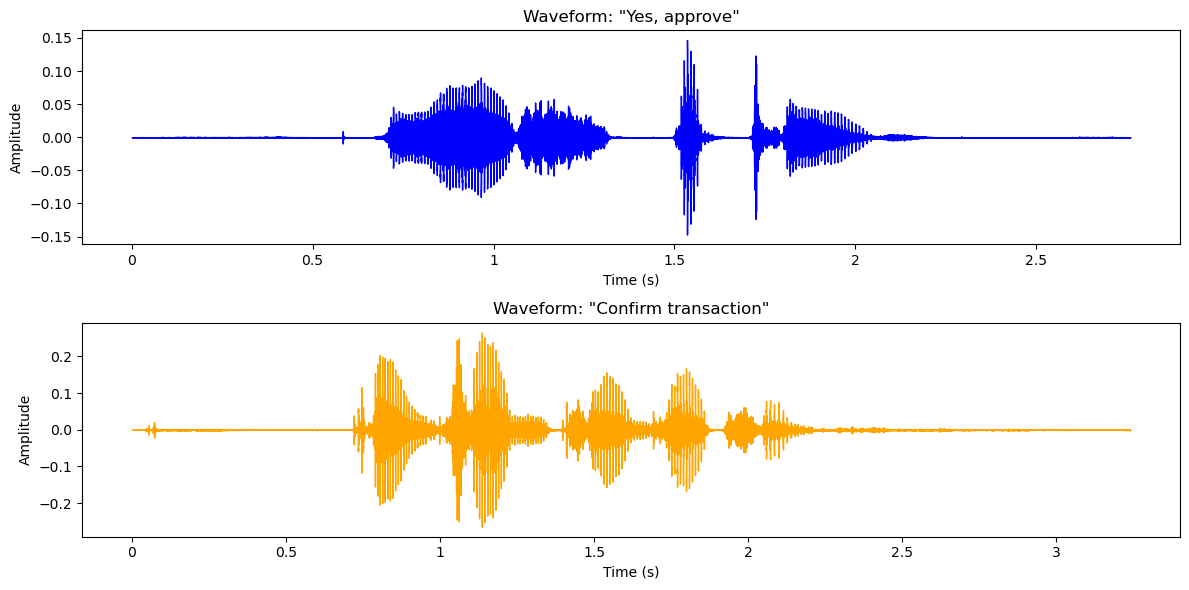

In [21]:
# Cell 4: Waveform Plotting (Corrected)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st plot
# Add a 'color' argument to waveshow
librosa.display.waveshow(y1, sr=sr1, color='blue') # Added color
plt.title('Waveform: "Yes, approve"')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd plot
# Keep the existing color here, or change if you want
librosa.display.waveshow(y2, sr=sr2, color='orange')
plt.title('Waveform: "Confirm transaction"')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout() # Adjusts subplot parameters for a tight layout.
plt.show()

--- Trimming Silence ---
Audio 1 Original Duration: 2.76s, Trimmed Duration: 1.49s
Trimmed from index 14848 to 47616
Audio 2 Original Duration: 3.24s, Trimmed Duration: 1.76s
Trimmed from index 15360 to 54272


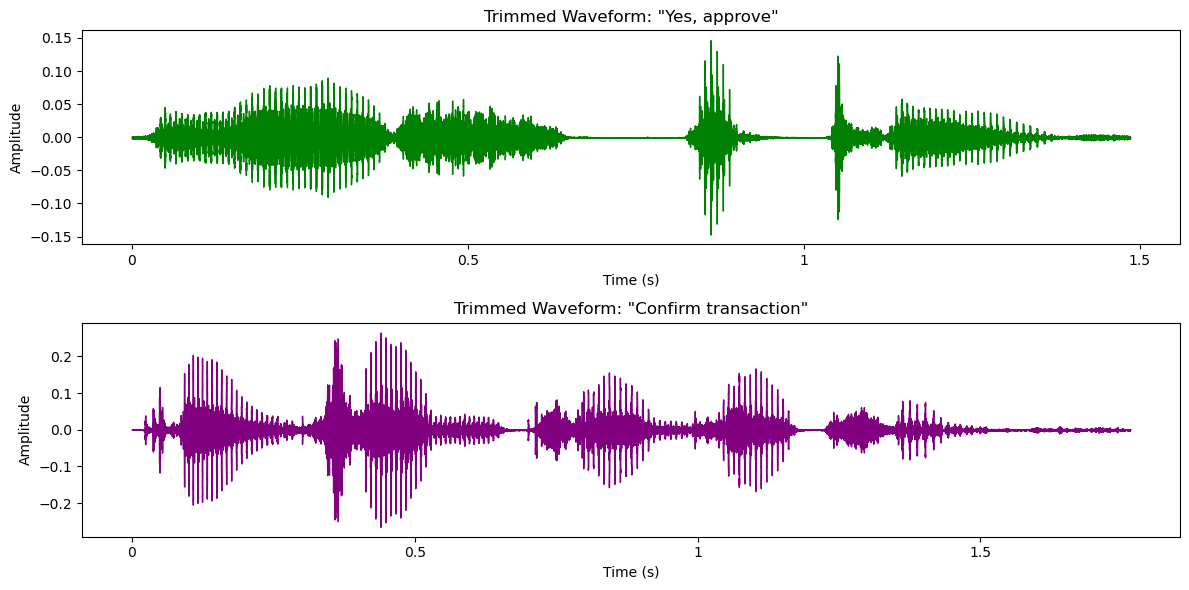

In [22]:
# Cell 5: Trim Silence and Plot Trimmed Waveforms

print("--- Trimming Silence ---")
# Trim silence for Audio 1
y1_trimmed, index1 = librosa.effects.trim(y1, top_db=30) # Using a slightly more aggressive top_db for speech
print(f"Audio 1 Original Duration: {len(y1)/sr1:.2f}s, Trimmed Duration: {len(y1_trimmed)/sr1:.2f}s")
print(f"Trimmed from index {index1[0]} to {index1[1]}")

# Trim silence for Audio 2
y2_trimmed, index2 = librosa.effects.trim(y2, top_db=30) # Using top_db=30
print(f"Audio 2 Original Duration: {len(y2)/sr2:.2f}s, Trimmed Duration: {len(y2_trimmed)/sr2:.2f}s")
print(f"Trimmed from index {index2[0]} to {index2[1]}")

# IMPORTANT: Reassign y1 and y2 to their trimmed versions for all subsequent operations
y1 = y1_trimmed
y2 = y2_trimmed

# Plot the TRIMMED waveforms
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y1, sr=sr1, color='green')
plt.title('Trimmed Waveform: "Yes, approve"')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y2, sr=sr2, color='purple')
plt.title('Trimmed Waveform: "Confirm transaction"')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

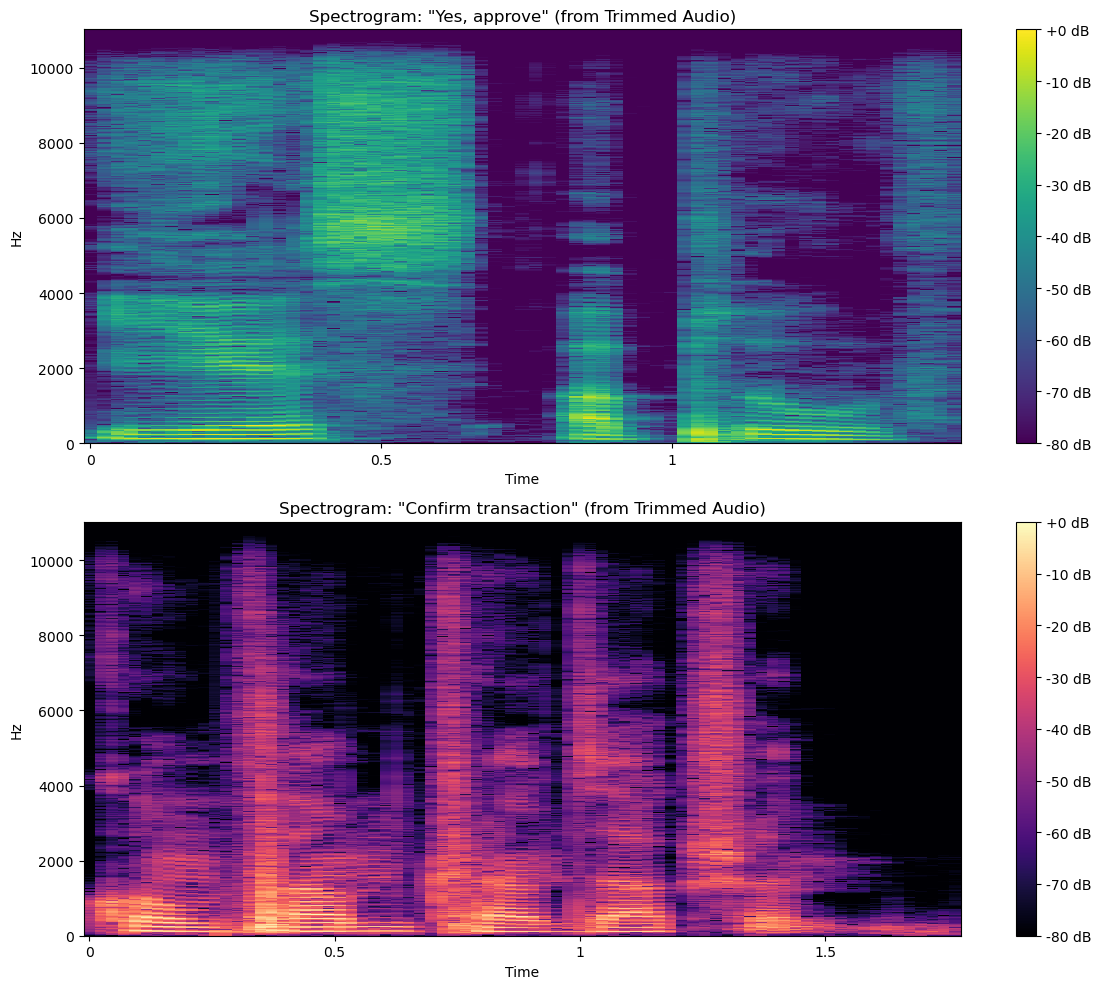

In [23]:
# Cell 6: Spectrogram Plotting (for both files - now using trimmed audio)

# For Audio 1: "Yes, approve"
D1 = librosa.stft(y1) # This will now operate on the trimmed y1
S_dB1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)

# For Audio 2: "Confirm transaction"
D2 = librosa.stft(y2) # This will now operate on the trimmed y2
S_dB2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)


plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(S_dB1, sr=sr1, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: "Yes, approve" (from Trimmed Audio)')
plt.tight_layout()

plt.subplot(2, 1, 2)
librosa.display.specshow(S_dB2, sr=sr2, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: "Confirm transaction" (from Trimmed Audio)')
plt.tight_layout()

plt.show()

--- Augmenting Audio Samples ---

--- Augmenting Audio 1 (Yes, approve) ---
Audio 1 Pitch Shifted: Duration 1.49 seconds (should be same as original trimmed)
Audio 1 Time Stretched: Duration 1.24 seconds (should be shorter than trimmed)
Audio 1 Noisy: Duration 1.49 seconds (should be same as original trimmed)

--- Augmenting Audio 2 (Confirm transaction) ---
Audio 2 Pitch Shifted: Duration 1.76 seconds
Audio 2 Time Stretched: Duration 2.12 seconds
Audio 2 Noisy: Duration 1.76 seconds

--- Visualizing Noisy 'Yes, approve' ---


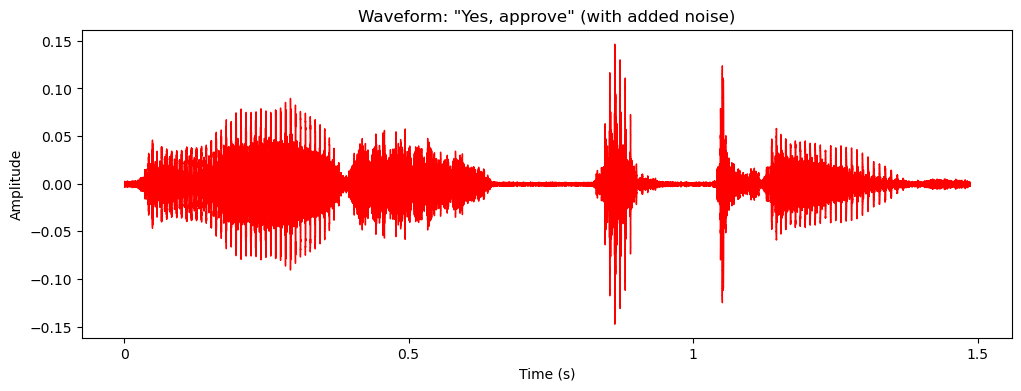

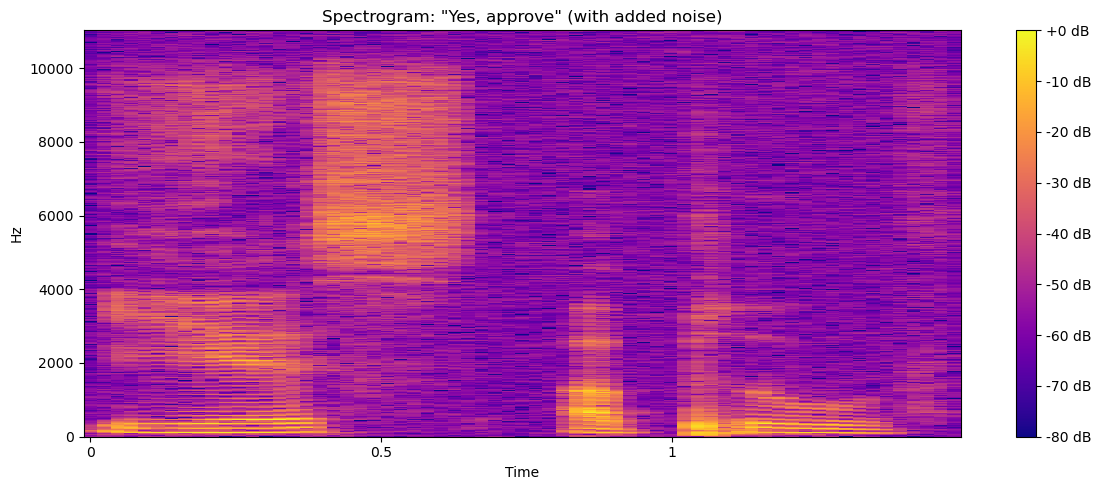


--- Visualizing Time-Stretched 'Confirm transaction' ---


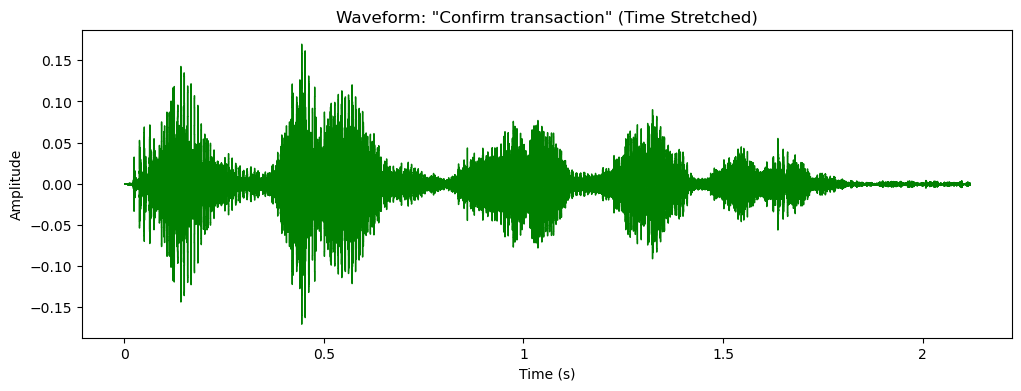

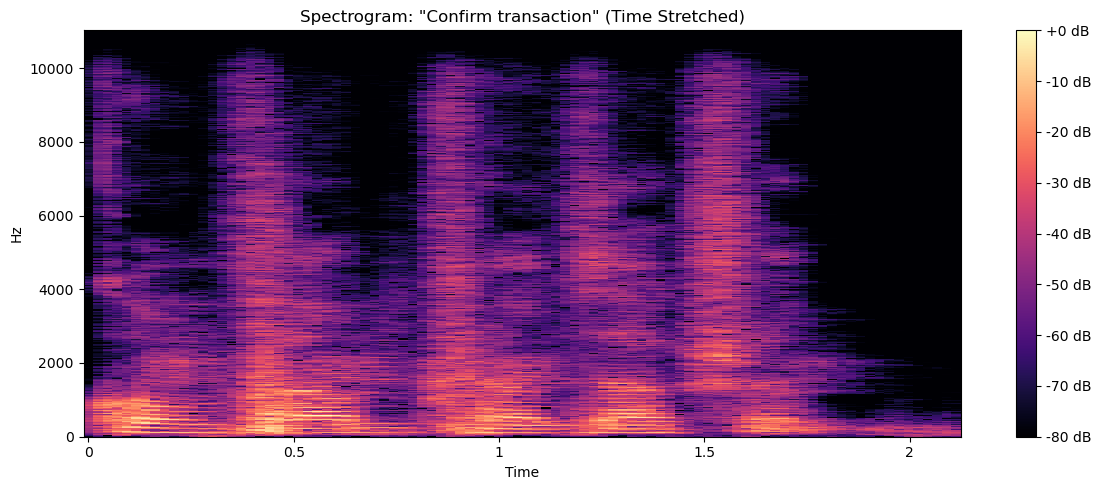

In [24]:
# Cell 7: Audio Augmentation (Updated to visualize one augmented example from each phrase)

# --- Augmentation Parameters (You can adjust these if you like) ---
pitch_shift_steps = 2       # Shift by 2 semitones up
time_stretch_rate = 1.2     # Speed up by 20%
noise_amplitude_factor = 0.005 # 0.5% of max signal amplitude as noise std dev

print("--- Augmenting Audio Samples ---")

# --- Augmentations for Audio 1: "Yes, approve" (using the trimmed y1, sr1) ---
print("\n--- Augmenting Audio 1 (Yes, approve) ---")

# 1. Pitch Shift
y1_pitch_shifted = librosa.effects.pitch_shift(y1, sr=sr1, n_steps=pitch_shift_steps)
print(f"Audio 1 Pitch Shifted: Duration {len(y1_pitch_shifted)/sr1:.2f} seconds (should be same as original trimmed)")

# 2. Time Stretch
y1_time_stretched = librosa.effects.time_stretch(y1, rate=time_stretch_rate)
print(f"Audio 1 Time Stretched: Duration {len(y1_time_stretched)/sr1:.2f} seconds (should be shorter than trimmed)")

# 3. Add Noise (White Noise)
noise_y1 = np.random.randn(len(y1))
noise_amplitude_y1 = noise_amplitude_factor * np.max(np.abs(y1))
y1_noisy = y1 + noise_amplitude_y1 * noise_y1
print(f"Audio 1 Noisy: Duration {len(y1_noisy)/sr1:.2f} seconds (should be same as original trimmed)")

# --- Augmentations for Audio 2: "Confirm transaction" (using the trimmed y2, sr2) ---
print("\n--- Augmenting Audio 2 (Confirm transaction) ---")

# 1. Pitch Shift
y2_pitch_shifted = librosa.effects.pitch_shift(y2, sr=sr2, n_steps=-pitch_shift_steps) # Shift down for variety
print(f"Audio 2 Pitch Shifted: Duration {len(y2_pitch_shifted)/sr2:.2f} seconds")

# 2. Time Stretch
y2_time_stretched = librosa.effects.time_stretch(y2, rate=1/time_stretch_rate) # Slow down for variety
print(f"Audio 2 Time Stretched: Duration {len(y2_time_stretched)/sr2:.2f} seconds")

# 3. Add Noise (White Noise)
noise_y2 = np.random.randn(len(y2))
noise_amplitude_y2 = noise_amplitude_factor * np.max(np.abs(y2))
y2_noisy = y2 + noise_amplitude_y2 * noise_y2
print(f"Audio 2 Noisy: Duration {len(y2_noisy)/sr2:.2f} seconds")

# --- Visualizing Augmented Examples ---


# Plot 1: Waveform and Spectrogram for Noisy 'Yes, approve'
print("\n--- Visualizing Noisy 'Yes, approve' ---")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y1_noisy, sr=sr1, color='red')
plt.title('Waveform: "Yes, approve" (with added noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

D1_noisy = librosa.stft(y1_noisy)
S_dB1_noisy = librosa.amplitude_to_db(np.abs(D1_noisy), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_dB1_noisy, sr=sr1, x_axis='time', y_axis='hz', cmap='plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: "Yes, approve" (with added noise)')
plt.tight_layout()
plt.show()


# Plot 2: Waveform and Spectrogram for Time-Stretched 'Confirm transaction'
print("\n--- Visualizing Time-Stretched 'Confirm transaction' ---")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y2_time_stretched, sr=sr2, color='green') 
plt.title('Waveform: "Confirm transaction" (Time Stretched)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

D2_time_stretched = librosa.stft(y2_time_stretched)
S_dB2_time_stretched = librosa.amplitude_to_db(np.abs(D2_time_stretched), ref=np.max)

plt.figure(figsize=(12, 5))
librosa.display.specshow(S_dB2_time_stretched, sr=sr2, x_axis='time', y_axis='hz', cmap='magma') 
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: "Confirm transaction" (Time Stretched)')
plt.tight_layout()
plt.show()

In [25]:
# Cell 8: Automated Feature Extraction for All Audio Files

# --- Configuration ---
raw_audio_dir = '../Data/audios/'
output_processed_dir = '../Data/processed/'
output_csv_filename = 'audio_features.csv'

# Ensure the output directory exists
os.makedirs(output_processed_dir, exist_ok=True)

pitch_shift_steps = 2
time_stretch_rate = 1.2
noise_amplitude_factor = 0.005 # 0.5% of max signal amplitude as noise std dev

# --- Feature Extraction Function ---
# This function is self-contained within Cell 8 for easy execution
def extract_audio_features(y, sr, n_mfcc=20):
    """
    Extracts MFCCs (mean and std), Spectral Roll-off (mean and std),
    and RMS Energy (mean and std) from an audio signal.

    Args:
        y (np.ndarray): Audio time series.
        sr (int): Sampling rate of the audio.
        n_mfcc (int): Number of MFCCs to compute.

    Returns:
        dict: A dictionary of extracted features, with flattened MFCCs.
    """
    features = {}

    # Handle empty audio gracefully
    if len(y) == 0:
        # Return default zero values for empty audio to prevent errors
        for j in range(n_mfcc):
            features[f'mfcc_mean_{j+1}'] = 0.0
            features[f'mfcc_std_{j+1}'] = 0.0
        features['rolloff_mean'] = 0.0
        features['rolloff_std'] = 0.0
        features['rms_mean'] = 0.0
        features['rms_std'] = 0.0
        return features

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfccs, axis=1) # Mean of each MFCC coefficient across time frames
    mfcc_std = np.std(mfccs, axis=1)   # Standard deviation of each MFCC coefficient across time frames

    # Flatten MFCCs into individual columns for the DataFrame
    for j in range(len(mfcc_mean)):
        features[f'mfcc_mean_{j+1}'] = mfcc_mean[j]
        features[f'mfcc_std_{j+1}'] = mfcc_std[j]

    # Spectral Roll-off
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0] # [0] because it returns a 2D array
    features['rolloff_mean'] = np.mean(rolloff)
    features['rolloff_std'] = np.std(rolloff)

    # RMS Energy
    rms = librosa.feature.rms(y=y)[0] # [0] because it returns a 2D array
    features['rms_mean'] = np.mean(rms)
    features['rms_std'] = np.std(rms)

    return features

# --- Main Processing Loop ---
all_extracted_features = []

print(f"Starting batch processing of audio files from: {raw_audio_dir}")

for filename in os.listdir(raw_audio_dir):
    if filename.endswith('.wav'):
        file_path = os.path.join(raw_audio_dir, filename)

        # --- 1. Parse metadata from filename ---
        try:
           
            base_name = os.path.splitext(filename)[0] # removes .wav extension
            parts = base_name.split('_')
            member_id = parts[0]
            phrase = '_'.join(parts[1:]) # Rejoin the rest for multi-word phrases (e.g., "yes_approve")

            print(f"\nProcessing file: {filename} (Member ID: {member_id}, Phrase: {phrase})")

        except IndexError:
            print(f"Skipping malformed filename: {filename}. Please ensure it follows 'member_id_phrase.wav' format.")
            continue # Skip to the next file if filename is not as expected

        # --- 2. Load Audio ---
        try:
            y_original, sr = librosa.load(file_path)
            print(f"  Loaded: {len(y_original)/sr:.2f} seconds.")
        except Exception as e:
            print(f"  Error loading {filename}: {e}")
            continue # Skip to the next file if loading fails

        # --- 3. Trim Silence ---
        # Using the same top_db as in previous cells for consistency
        y_trimmed, _ = librosa.effects.trim(y_original, top_db=30)
        print(f"  Trimmed: {len(y_trimmed)/sr:.2f} seconds (Original was {len(y_original)/sr:.2f}s)")

        # --- 4. Prepare samples for augmentation and feature extraction ---
        # List of (audio_signal, augmentation_type) tuples
        samples_to_process = [
            (y_trimmed, 'original') # The trimmed original audio
        ]

        # Apply augmentations and add to list
        # Pitch Shift
        y_pitch_shifted = librosa.effects.pitch_shift(y_trimmed, sr=sr, n_steps=pitch_shift_steps)
        samples_to_process.append((y_pitch_shifted, 'pitch_shifted'))

        # Time Stretch
        # Note: Time stretching can sometimes result in slightly different lengths, but librosa handles it
        y_time_stretched = librosa.effects.time_stretch(y_trimmed, rate=time_stretch_rate)
        samples_to_process.append((y_time_stretched, 'time_stretched'))

        # Add Noise
        # Ensure noise is generated with the same length as the audio segment it's applied to
        noise = np.random.randn(len(y_trimmed))
        # Scale the noise based on a factor of the audio's peak amplitude
        noise_amplitude = noise_amplitude_factor * np.max(np.abs(y_trimmed))
        y_noisy = y_trimmed + noise_amplitude * noise
        samples_to_process.append((y_noisy, 'noisy'))

        # --- 5. Extract Features for each version (original + augmented) ---
        for audio_signal, aug_type in samples_to_process:
            print(f"    Extracting features for {aug_type} version...")
            try:
                features = extract_audio_features(audio_signal, sr)
                # Combine metadata with extracted features
                row_data = {
                    'member_id': member_id,
                    'phrase': phrase,
                    'augmentation': aug_type
                }
                row_data.update(features) # Merge the extracted features dictionary into row_data
                all_extracted_features.append(row_data)
            except Exception as e:
                print(f"      ERROR during feature extraction for {filename} ({aug_type}): {e}")

# --- Convert to DataFrame and Save ---
if all_extracted_features:
    features_df = pd.DataFrame(all_extracted_features)
    output_csv_path = os.path.join(output_processed_dir, output_csv_filename)
    features_df.to_csv(output_csv_path, index=False)
    print(f"\n--- Processing Complete ---")
    print(f"Successfully extracted features for {len(features_df)} total audio samples.")
    print(f"Features saved to: {output_csv_path}")
    print("\nFirst 5 rows of the combined feature DataFrame:")
    print(features_df.head())
    print("\nShape of the feature DataFrame:", features_df.shape)
    print("\nUnique Member IDs found:", features_df['member_id'].unique())
    print("Unique Phrases found:", features_df['phrase'].unique())
    print("Unique Augmentation types found:", features_df['augmentation'].unique())
else:
    print("\n--- Processing Complete ---")
    print("No features were extracted. Please check your raw audio directory and filenames.")

Starting batch processing of audio files from: ../Data/audios/

Processing file: Christophe_yes_approve.wav (Member ID: Christophe, Phrase: yes_approve)
  Loaded: 2.76 seconds.
  Trimmed: 1.49 seconds (Original was 2.76s)
    Extracting features for original version...
    Extracting features for pitch_shifted version...
    Extracting features for time_stretched version...
    Extracting features for noisy version...

Processing file: kanisa_confirm_transaction.wav (Member ID: kanisa, Phrase: confirm_transaction)
  Loaded: 2.04 seconds.
  Trimmed: 1.42 seconds (Original was 2.04s)
    Extracting features for original version...
    Extracting features for pitch_shifted version...
    Extracting features for time_stretched version...
    Extracting features for noisy version...

Processing file: Christophe_confirm_transaction.wav (Member ID: Christophe, Phrase: confirm_transaction)
  Loaded: 3.24 seconds.
  Trimmed: 1.76 seconds (Original was 3.24s)
    Extracting features for original

Task 4: Voiceprint Verification Model Creation

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


processed_data_dir = '../Data/processed/'
features_csv_filename = 'audio_features.csv'

# Directory to save trained models and scalers
model_output_dir = '../models/'

# Ensure the model output directory exists. It will create it if it doesn't.
os.makedirs(model_output_dir, exist_ok=True)

print("--- Starting Voiceprint Verification Model Creation ---")

--- Starting Voiceprint Verification Model Creation ---


 Load the Processed Audio Features

In [27]:
print("\n1. Loading processed audio features...")
try:
    df_features = pd.read_csv(os.path.join(processed_data_dir, features_csv_filename))
    print(f"Features DataFrame loaded successfully from: {os.path.join(processed_data_dir, features_csv_filename)}")
    print(f"Shape: {df_features.shape} (rows: samples, columns: features + metadata)")
    print("First 5 rows of the DataFrame:\n", df_features.head())
except FileNotFoundError:
    print(f"Error: The file '{features_csv_filename}' was not found in '{processed_data_dir}'.")
    print("Please ensure Cell 8 (Automated Feature Extraction) was run successfully and the 'processed_data_dir' path is correct.")
    # Exiting or raising an error here might be appropriate in a script,
    # but for a notebook, we can just print and let the user correct.
    raise # Re-raise the error to stop execution if the file is missing


1. Loading processed audio features...
Features DataFrame loaded successfully from: ../Data/processed/audio_features.csv
Shape: (32, 47) (rows: samples, columns: features + metadata)
First 5 rows of the DataFrame:
     member_id               phrase    augmentation  mfcc_mean_1  mfcc_std_1  \
0  Christophe          yes_approve        original  -462.471680  133.834305   
1  Christophe          yes_approve   pitch_shifted  -476.510437  105.912628   
2  Christophe          yes_approve  time_stretched  -464.216370  102.664116   
3  Christophe          yes_approve           noisy  -393.602317   69.352179   
4      kanisa  confirm_transaction        original  -553.895996   85.606750   

   mfcc_mean_2  mfcc_std_2  mfcc_mean_3  mfcc_std_3  mfcc_mean_4  ...  \
0    67.155640   93.730782    27.147636   30.231096    18.322121  ...   
1    69.988655   93.771263    25.387865   33.178123    15.598012  ...   
2    72.267921   94.187035    26.661131   30.281918    18.634590  ...   
3    38.499693   

2. Prepare X (Features) and y (Target Variable)

In [ ]:
print("\n2. Preparing features (X) and target (y)...")

# The target variable (what we want to predict) is 'member_id'
y = df_features['member_id']


feature_columns = [col for col in df_features.columns if col not in ['member_id', 'phrase', 'augmentation']]
X = df_features[feature_columns]

print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")
print("\nExample of X (first 3 rows, first 5 features):\n", X.head(3).iloc[:, :5]) # Show first 5 features for brevity
print("\nExample of y (first 3 rows):\n", y.head(3))


2. Preparing features (X) and target (y)...
Shape of X (features): (32, 44)
Shape of y (target): (32,)

Example of X (first 3 rows, first 5 features):
    mfcc_mean_1  mfcc_std_1  mfcc_mean_2  mfcc_std_2  mfcc_mean_3
0  -462.471680  133.834305    67.155640   93.730782    27.147636
1  -476.510437  105.912628    69.988655   93.771263    25.387865
2  -464.216370  102.664116    72.267921   94.187035    26.661131

Example of y (first 3 rows):
 0    Christophe
1    Christophe
2    Christophe
Name: member_id, dtype: object


3. Split the Data into Training and Testing Sets

In [29]:
print("\n3. Splitting data into training and testing sets (80% train, 20% test)...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribution of member_ids in y_train (normalized):\n", y_train.value_counts(normalize=True).sort_index())
print("Distribution of member_ids in y_test (normalized):\n", y_test.value_counts(normalize=True).sort_index())


3. Splitting data into training and testing sets (80% train, 20% test)...
X_train shape: (25, 44)
X_test shape: (7, 44)
y_train shape: (25,)
y_test shape: (7,)

Distribution of member_ids in y_train (normalized):
 member_id
Anne          0.24
Christophe    0.28
Excel         0.24
kanisa        0.24
Name: proportion, dtype: float64
Distribution of member_ids in y_test (normalized):
 member_id
Anne          0.285714
Christophe    0.142857
Excel         0.285714
kanisa        0.285714
Name: proportion, dtype: float64


4. Feature Scaling 

In [30]:
print("\n4. Scaling features using StandardScaler (fitting only on training data)...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Transform test data using the fitted scaler

print("Features scaled successfully.")
print("Example of scaled X_train (first 3 rows, first 5 features):\n", X_train_scaled[:3, :5])


4. Scaling features using StandardScaler (fitting only on training data)...
Features scaled successfully.
Example of scaled X_train (first 3 rows, first 5 features):
 [[-0.66814695  0.00851633 -0.47453616  0.49155442 -0.56655252]
 [-0.5829134   0.03132979 -0.51871656  0.72600978 -0.27726076]
 [-1.20949513 -0.99826021  0.19582602 -0.69836547 -0.77872982]]


5. Model Training

In [ ]:
print("\n5. Training the RandomForestClassifier model...")


model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

print("RandomForestClassifier model training complete.")


5. Training the RandomForestClassifier model...
RandomForestClassifier model training complete.


6. Model Evaluation

In [ ]:
print("\n6. Evaluating the model on the test set...")

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

print("\n--- Model Performance Metrics ---")

print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Format to 4 decimal places

print("\nClassification Report (Precision, Recall, F1-Score per Member ID):")
# The classification_report provides a detailed breakdown of metrics per class
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=model.classes_))
print("\nOrder of labels in Confusion Matrix (Rows/Columns):", model.classes_)


6. Evaluating the model on the test set...

--- Model Performance Metrics ---

Accuracy Score:
Accuracy: 0.8571

Classification Report (Precision, Recall, F1-Score per Member ID):
              precision    recall  f1-score   support

        Anne       1.00      1.00      1.00         2
  Christophe       0.50      1.00      0.67         1
       Excel       1.00      0.50      0.67         2
      kanisa       1.00      1.00      1.00         2

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.83         7
weighted avg       0.93      0.86      0.86         7


Confusion Matrix:
[[2 0 0 0]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 0 2]]

Order of labels in Confusion Matrix (Rows/Columns): ['Anne' 'Christophe' 'Excel' 'kanisa']


Visualizing the Confusion Matrix


--- Visualizing Confusion Matrix ---


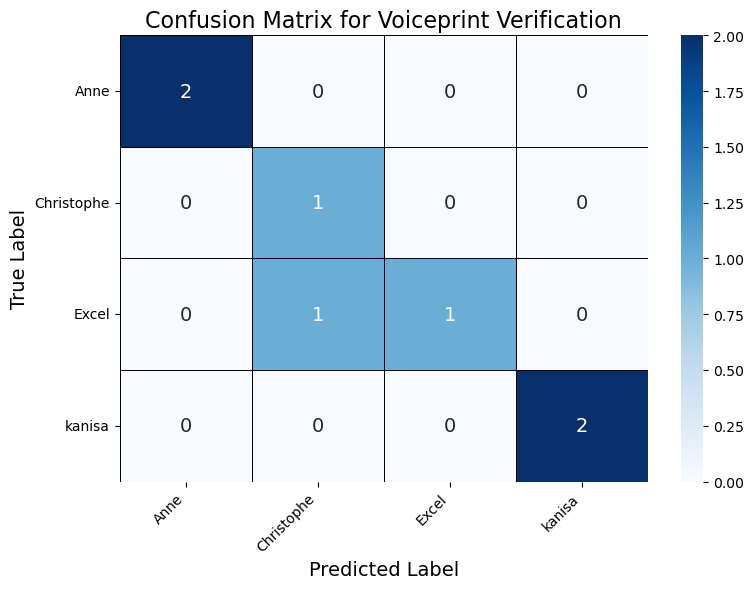

Confusion Matrix Visualization Displayed.


In [34]:
print("\n--- Visualizing Confusion Matrix ---")

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Get the class labels (member_ids) in the correct order for plotting
class_names = model.classes_

# Create a DataFrame for the confusion matrix for better labeling
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True,
            linewidths=.5, linecolor='black', annot_kws={"size": 14}) # fmt='d' for integer annotations
plt.title('Confusion Matrix for Voiceprint Verification', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("Confusion Matrix Visualization Displayed.")

Visualizing Feature Importances (for Random Forest)


--- Visualizing Feature Importances ---


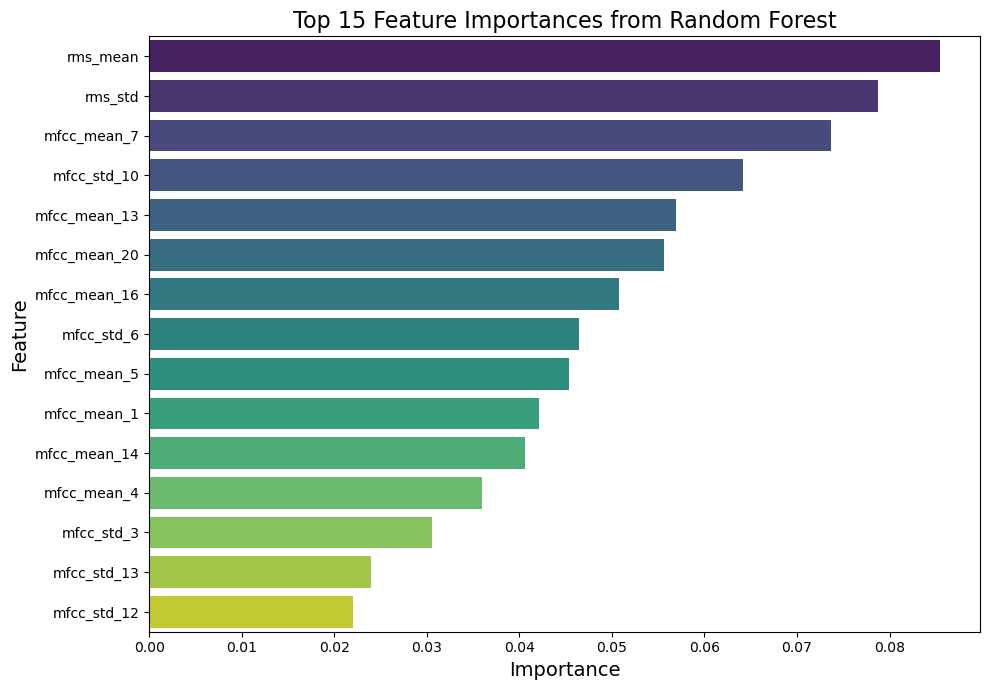

Feature Importance Visualization Displayed.


In [36]:
print("\n--- Visualizing Feature Importances ---")

# Get feature importances from the trained Random Forest model
importances = model.feature_importances_

# Get the names of the features from the training data
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance in descending order and select top N features if desired
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# You can choose to plot top N features if you have many
top_n = 15 # Adjust this number as needed to show relevant features

plt.figure(figsize=(10, 7))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importance_df.head(top_n),
    # Corrected line to address the FutureWarning:
    hue='feature',        # Assign 'feature' (your y-variable) to hue
    palette='viridis',    # Keep your desired palette
    legend=False          # Crucially, tell Seaborn not to draw a legend for each bar
)
plt.title(f'Top {top_n} Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

print("Feature Importance Visualization Displayed.")

Save the Trained Model and Scaler

In [37]:
print("\n7. Saving the trained model and scaler ")

# Define file paths for saving
model_path = os.path.join(model_output_dir, 'voiceprint_classifier_model.joblib')
scaler_path = os.path.join(model_output_dir, 'feature_scaler.joblib')

# Save the model
joblib.dump(model, model_path)
print(f"Trained Random Forest Classifier model saved to: {model_path}")

# Save the scaler
joblib.dump(scaler, scaler_path)
print(f"Fitted StandardScaler saved to: {scaler_path}")

print("\n--- Task 4: Voiceprint Verification Model Creation completed successfully! ---")
print("You now have a trained model ready for integration into the final system.")


7. Saving the trained model and scaler 
Trained Random Forest Classifier model saved to: ../models/voiceprint_classifier_model.joblib
Fitted StandardScaler saved to: ../models/feature_scaler.joblib

--- Task 4: Voiceprint Verification Model Creation completed successfully! ---
You now have a trained model ready for integration into the final system.
